In [3]:
# 10 minutes to pandas
import numpy as np
import pandas as pd

In [4]:
# Object creation
# creating a series by passing a list of values and letting pandas create a default integer index
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
# creating a DataFrame by passing a NumPy array with a datetime index and labeled columns
dates = pd.date_range('20130101', periods = 6)
dates
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.158746,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828
2013-01-04,0.173539,0.248287,-0.288871,0.304251
2013-01-05,-1.215864,0.993782,0.712249,1.315658
2013-01-06,1.474292,-0.441567,-0.622103,1.115991


In [6]:
# creating a DataFrame by passing a dict of ojbjecs that can be converted to series-like
df2 = pd.DataFrame({'A':1,'B':pd.Timestamp('20130102'), 'C':pd.Series(1,index=list(range(4)),dtype='float32'),'D':np.array([3]*4,dtype='int32'),'E':pd.Categorical(["test","train","test","train"]),'F':'foo'})
df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [8]:
df2.<TAB>

SyntaxError: invalid syntax (<ipython-input-8-915637deb483>, line 1)

In [9]:
# Viewing Data
df.head()

,A,B,C,D
2013-01-01,-0.158746,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828
2013-01-04,0.173539,0.248287,-0.288871,0.304251
2013-01-05,-1.215864,0.993782,0.712249,1.315658


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,0.173539,0.248287,-0.288871,0.304251
2013-01-05,-1.215864,0.993782,0.712249,1.315658
2013-01-06,1.474292,-0.441567,-0.622103,1.115991


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
# DataFrame.to_numpy() gives a Numpy representation of the underlying data. Note that this  can be an expensive operation when your DataFrame has colunmns with different data types, which comes down to a fundamental difference between Pandas and Numpy. Numpy arrays have one dtype for the entire array, while pandas dataframes have one data type per column.
df.to_numpy()

array([[-0.15874608,  1.08763887,  0.67860792,  0.8364253 ],
       [ 0.08642578,  2.0297937 ,  0.3939931 ,  0.27513121],
       [-0.46377236,  0.36802779, -0.10769876, -2.82482775],
       [ 0.173539  ,  0.24828721, -0.28887119,  0.30425116],
       [-1.215864  ,  0.99378195,  0.71224869,  1.31565769],
       [ 1.47429179, -0.44156735, -0.62210302,  1.11599125]])

In [14]:
import pandas
print(pandas.__version__)

0.24.2


In [15]:
pip install --upgrade pandas


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pandas

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [16]:
# show a quick staistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.017354,0.714327,0.127696,0.170438
std,0.886332,0.851013,0.549046,1.526409
min,-1.215864,-0.441567,-0.622103,-2.824828
25%,-0.387516,0.278222,-0.243578,0.282411
50%,-0.036160,0.680905,0.143147,0.570338
75%,0.151761,1.064175,0.607454,1.046100
max,1.474292,2.029794,0.712249,1.315658


In [17]:
# Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.158746,0.086426,-0.463772,0.173539,-1.215864,1.474292
B,1.087639,2.029794,0.368028,0.248287,0.993782,-0.441567
C,0.678608,0.393993,-0.107699,-0.288871,0.712249,-0.622103
D,0.836425,0.275131,-2.824828,0.304251,1.315658,1.115991


In [18]:
# sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.836425,0.678608,1.087639,-0.158746
2013-01-02,0.275131,0.393993,2.029794,0.086426
2013-01-03,-2.824828,-0.107699,0.368028,-0.463772
2013-01-04,0.304251,-0.288871,0.248287,0.173539
2013-01-05,1.315658,0.712249,0.993782,-1.215864
2013-01-06,1.115991,-0.622103,-0.441567,1.474292


In [19]:
# sorting by values
df.sort_values(by='B')

,A,B,C,D
2013-01-06,1.474292,-0.441567,-0.622103,1.115991
2013-01-04,0.173539,0.248287,-0.288871,0.304251
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828
2013-01-05,-1.215864,0.993782,0.712249,1.315658
2013-01-01,-0.158746,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131


In [20]:
df['A']

2013-01-01   -0.158746
2013-01-02    0.086426
2013-01-03   -0.463772
2013-01-04    0.173539
2013-01-05   -1.215864
2013-01-06    1.474292
Freq: D, Name: A, dtype: float64

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,-0.158746,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828


In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828
2013-01-04,0.173539,0.248287,-0.288871,0.304251


In [23]:
df.loc[dates[0]]

A   -0.158746
B    1.087639
C    0.678608
D    0.836425
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.158746,1.087639
2013-01-02,0.086426,2.029794
2013-01-03,-0.463772,0.368028
2013-01-04,0.173539,0.248287
2013-01-05,-1.215864,0.993782
2013-01-06,1.474292,-0.441567


In [25]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.086426,2.029794
2013-01-03,-0.463772,0.368028
2013-01-04,0.173539,0.248287


In [26]:
df.loc['20130102',['A','B']]

A    0.086426
B    2.029794
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
# getting a scalar value
df.loc[dates[0],'A']
df.at[dates[0],'A']

-0.15874608004575688

In [28]:
# selecting by position
df.iloc[3]

A    0.173539
B    0.248287
C   -0.288871
D    0.304251
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.173539,0.248287
2013-01-05,-1.215864,0.993782


In [30]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.086426,0.393993
2013-01-03,-0.463772,-0.107699
2013-01-05,-1.215864,0.712249


In [31]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828


In [32]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.087639,0.678608
2013-01-02,2.029794,0.393993
2013-01-03,0.368028,-0.107699
2013-01-04,0.248287,-0.288871
2013-01-05,0.993782,0.712249
2013-01-06,-0.441567,-0.622103


In [33]:
df.iloc[1,1]

2.029793695060222

In [34]:
df.iat[1,1]

2.029793695060222

In [35]:
# Boolean indexing
df[df.D>0]

,A,B,C,D
2013-01-01,-0.158746,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-04,0.173539,0.248287,-0.288871,0.304251
2013-01-05,-1.215864,0.993782,0.712249,1.315658
2013-01-06,1.474292,-0.441567,-0.622103,1.115991


In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.087639,0.678608,0.836425
2013-01-02,0.086426,2.029794,0.393993,0.275131
2013-01-03,NaN,0.368028,NaN,NaN
2013-01-04,0.173539,0.248287,NaN,0.304251
2013-01-05,NaN,0.993782,0.712249,1.315658
2013-01-06,1.474292,NaN,NaN,1.115991


In [39]:
# using isin() method for filtering
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.463772,0.368028,-0.107699,-2.824828,two
2013-01-05,-1.215864,0.993782,0.712249,1.315658,four


In [40]:
# setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1

In [42]:
df.at[dates[0],'A'] = 0

In [43]:
df.iat[0,1] = 0

In [44]:
df.loc[:,'D'] = np.array([5]*len(df))

In [45]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.678608,5,NaN
2013-01-02,0.086426,2.029794,0.393993,5,1.0
2013-01-03,-0.463772,0.368028,-0.107699,5,2.0
2013-01-04,0.173539,0.248287,-0.288871,5,3.0
2013-01-05,-1.215864,0.993782,0.712249,5,4.0
2013-01-06,1.474292,-0.441567,-0.622103,5,5.0


In [46]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.678608,-5,NaN
2013-01-02,-0.086426,-2.029794,-0.393993,-5,-1.0
2013-01-03,-0.463772,-0.368028,-0.107699,-5,-2.0
2013-01-04,-0.173539,-0.248287,-0.288871,-5,-3.0
2013-01-05,-1.215864,-0.993782,-0.712249,-5,-4.0
2013-01-06,-1.474292,-0.441567,-0.622103,-5,-5.0


In [47]:
# missing data operations
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.678608,5,NaN,1.0
2013-01-02,0.086426,2.029794,0.393993,5,1.0,1.0
2013-01-03,-0.463772,0.368028,-0.107699,5,2.0,NaN
2013-01-04,0.173539,0.248287,-0.288871,5,3.0,NaN


In [48]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.086426,2.029794,0.393993,5,1.0,1.0


In [49]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.678608,5,5.0,1.0
2013-01-02,0.086426,2.029794,0.393993,5,1.0,1.0
2013-01-03,-0.463772,0.368028,-0.107699,5,2.0,5.0
2013-01-04,0.173539,0.248287,-0.288871,5,3.0,5.0


In [50]:
# to get the boolean mask where vaules are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [51]:
# Operations
## stats: performing a descriptive statistic
df.mean()


A    0.009103
B    0.533054
C    0.127696
D    5.000000
F    3.000000
dtype: float64

In [52]:
df.mean(1)

2013-01-01    1.419652
2013-01-02    1.702043
2013-01-03    1.359311
2013-01-04    1.626591
2013-01-05    1.898033
2013-01-06    2.082124
Freq: D, dtype: float64

In [53]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates.shift(2))
s

2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
2013-01-07    6.0
2013-01-08    8.0
Freq: D, dtype: float64

In [54]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.463772,-0.631972,-1.107699,4.0,1.0
2013-01-04,-2.826461,-2.751713,-3.288871,2.0,0.0
2013-01-05,-6.215864,-4.006218,-4.287751,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN


In [55]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.678608,5,NaN
2013-01-02,0.086426,2.029794,1.072601,10,1.0
2013-01-03,-0.377347,2.397821,0.964902,15,3.0
2013-01-04,-0.203808,2.646109,0.676031,20,6.0
2013-01-05,-1.419672,3.639891,1.388280,25,10.0
2013-01-06,0.054620,3.198323,0.766177,30,15.0


In [56]:
df.apply(lambda x: x.max() - x.min())

A    2.690156
B    2.471361
C    1.334352
D    0.000000
F    4.000000
dtype: float64

In [57]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    5
2    1
3    2
4    4
5    5
6    5
7    0
8    2
9    0
dtype: int32

In [58]:
s.value_counts()

5    4
2    2
0    2
4    1
1    1
dtype: int64

In [59]:
# string methods, Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array.
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [60]:
# Merge
# 1. concatenating pandas objects together with concat()
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.155221,-0.589329,0.943669,-0.623082
1,-0.936575,-0.626461,0.220533,2.298611
2,1.439750,-0.396419,-0.426474,1.300331
3,0.366672,0.078572,0.308284,-2.285448
4,-0.847920,0.779011,-0.374497,-0.114367
5,-0.156042,1.508495,-1.103091,-0.924133
6,0.169179,-1.230310,1.112257,-0.505006
7,1.582259,0.974583,-1.516777,0.276489
8,-0.054002,1.594583,-1.803679,0.918100
9,-2.119551,1.524985,0.426534,-1.965938


In [61]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.155221,-0.589329,0.943669,-0.623082
1,-0.936575,-0.626461,0.220533,2.298611
2,1.439750,-0.396419,-0.426474,1.300331
3,0.366672,0.078572,0.308284,-2.285448
4,-0.847920,0.779011,-0.374497,-0.114367
5,-0.156042,1.508495,-1.103091,-0.924133
6,0.169179,-1.230310,1.112257,-0.505006
7,1.582259,0.974583,-1.516777,0.276489
8,-0.054002,1.594583,-1.803679,0.918100
9,-2.119551,1.524985,0.426534,-1.965938


In [63]:
# Join
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [64]:
right

,key,rval
0,foo,4
1,foo,5


In [65]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [66]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [67]:
right

,key,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [69]:
# Append rows to a dataframe
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.815329,0.630717,-1.783715,-0.610904
1,-1.003881,-0.299862,-1.670529,1.148569
2,-0.365148,-0.799612,-1.153185,1.133995
3,0.246257,1.219540,0.593765,0.930732
4,-0.520260,-0.484414,-1.405976,-1.203818
5,0.219481,0.605222,-0.167137,-0.345736
6,-0.285924,0.826042,-0.455606,0.326580
7,1.333409,-0.333130,-0.001251,-1.059113


In [71]:
df3 = pd.DataFrame(np.random.randn(10,6), columns = ['A','B','C','D','E','F'])
df3

,A,B,C,D,E,F
0,-0.840582,1.022056,0.657395,-2.120582,0.723791,0.660617
1,0.088890,0.863795,0.001811,-0.094592,0.401070,0.527166
2,0.040785,-1.168423,-2.293537,0.422388,-0.609220,-1.624664
3,0.276137,-0.959879,0.186929,0.275750,0.229673,0.795580
4,-0.602737,-0.592361,-1.544159,-0.673630,-1.124274,0.514749
5,0.957392,-0.253634,-0.829628,-0.046454,2.437636,-0.118328
6,-0.330220,1.075173,-0.215956,-1.312469,-0.181299,0.846507
7,0.579167,0.326052,1.004130,0.991038,-0.094633,-0.156271
8,-0.407949,-0.814295,-0.302004,-0.453858,-0.078819,3.372840
9,-1.081485,1.206228,-1.128571,2.474669,0.617570,-0.680503


In [73]:
s = df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,0.815329,0.630717,-1.783715,-0.610904
1,-1.003881,-0.299862,-1.670529,1.148569
2,-0.365148,-0.799612,-1.153185,1.133995
3,0.246257,1.219540,0.593765,0.930732
4,-0.520260,-0.484414,-1.405976,-1.203818
5,0.219481,0.605222,-0.167137,-0.345736
6,-0.285924,0.826042,-0.455606,0.326580
7,1.333409,-0.333130,-0.001251,-1.059113
8,0.246257,1.219540,0.593765,0.930732


In [74]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B':['one','one','two','three','two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.747464,-0.534322
1,bar,one,0.351579,0.298805
2,foo,two,1.109628,-0.440602
3,bar,three,0.236148,-1.642869
4,foo,two,0.372794,-0.891857
5,bar,two,-0.333685,0.167016
6,foo,one,1.329097,1.562261
7,foo,three,1.265663,0.359637


In [75]:
# grouping and then applying the sum() functio nto the resulting groups
df.groupby('A').sum()

,C,D
A,,
bar,0.254043,-1.177048
foo,4.824646,0.055117


In [76]:
# grouping by multiple columns forms a hierarchical index and again we can apply the sum function
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.351579  0.298805
    three  0.236148 -1.642869
    two   -0.333685  0.167016
foo one    2.076561  1.027939
    three  1.265663  0.359637
    two    1.482422 -1.332459

In [77]:
# reshaping 
tuples = list(zip(*[['bar','bar','baz','baz','foo','foo','qux','qux'], ['one','two','one','two','one','two','one','two']]))
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index, columns=['A','B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.665200 -1.222227
      two    -1.637322  0.977612
baz   one    -1.289037 -0.877114
      two    -0.550531 -1.658872

In [78]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.665200
               B   -1.222227
       two     A   -1.637322
               B    0.977612
baz    one     A   -1.289037
               B   -0.877114
       two     A   -0.550531
               B   -1.658872
dtype: float64

In [79]:
# the inverse operation of stack is unstack() which by default unstacks the last level
stacked.unstack()

A         B
first second                    
bar   one     0.665200 -1.222227
      two    -1.637322  0.977612
baz   one    -1.289037 -0.877114
      two    -0.550531 -1.658872

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.665200 -1.637322
      B -1.222227  0.977612
baz   A -1.289037 -0.550531
      B -0.877114 -1.658872

In [83]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.665200 -1.289037
       B -1.222227 -0.877114
two    A -1.637322 -0.550531
       B  0.977612 -1.658872

In [86]:
# Pivot Tables
df = pd.DataFrame({ 'A':['one','one','two','three']*3,
                   'B':['A','B','C']*4,
                  'C':['foo','bar','foo','bar','foo','bar']*2,
                   'D':np.random.randn(12),
                   'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.929626,0.514108
1,one,B,bar,1.090613,-0.910798
2,two,C,foo,0.115368,-0.645108
3,three,A,bar,0.913005,-0.477248
4,one,B,foo,0.009108,-1.431218
5,one,C,bar,0.012255,0.737648
6,two,A,foo,-0.844045,1.288655
7,three,B,bar,-0.753493,-0.975248
8,one,C,foo,0.904570,0.161191
9,one,A,bar,1.463046,-0.202805


In [88]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  1.463046 -0.929626
      B  1.090613  0.009108
      C  0.012255  0.904570
three A  0.913005       NaN
      B -0.753493       NaN
      C -1.028610       NaN
two   A       NaN -0.844045
      B       NaN -1.445454
      C       NaN  0.115368

In [90]:
# Time Series: pandas has simple, efficient and powerful functionality for performing resampleing operations during frequency conversion.
rng = pd.date_range('1/1/2012',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()

2012-01-01    26628
Freq: 5T, dtype: int32

In [91]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06    0.844891
2012-03-07    0.515099
2012-03-08   -0.409910
2012-03-09    0.302278
2012-03-10    1.130402
Freq: D, dtype: float64

In [92]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.844891
2012-03-07 00:00:00+00:00    0.515099
2012-03-08 00:00:00+00:00   -0.409910
2012-03-09 00:00:00+00:00    0.302278
2012-03-10 00:00:00+00:00    1.130402
Freq: D, dtype: float64

In [93]:
# converting to another time_zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.844891
2012-03-06 19:00:00-05:00    0.515099
2012-03-07 19:00:00-05:00   -0.409910
2012-03-08 19:00:00-05:00    0.302278
2012-03-09 19:00:00-05:00    1.130402
Freq: D, dtype: float64

In [96]:
# converting between time  span representations
rng = pd.date_range('1/1/2012',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31   -1.877125
2012-02-29   -0.673022
2012-03-31    1.269553
2012-04-30    0.638457
2012-05-31    0.105094
Freq: M, dtype: float64

In [97]:
ps = ts.to_period()
ps

2012-01   -1.877125
2012-02   -0.673022
2012-03    1.269553
2012-04    0.638457
2012-05    0.105094
Freq: M, dtype: float64

In [98]:
ps.to_timestamp()

2012-01-01   -1.877125
2012-02-01   -0.673022
2012-03-01    1.269553
2012-04-01    0.638457
2012-05-01    0.105094
Freq: MS, dtype: float64

In [99]:
# converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq('M','e') + 1).asfreq('H','s') + 9
ts.head()

1990-03-01 09:00    0.199565
1990-06-01 09:00   -1.046759
1990-09-01 09:00   -0.699989
1990-12-01 09:00   -1.725394
1991-03-01 09:00   -1.554712
Freq: H, dtype: float64

In [100]:
ts.tail(3)

2000-06-01 09:00    0.013445
2000-09-01 09:00    0.630465
2000-12-01 09:00   -0.766040
Freq: H, dtype: float64

In [102]:
# pandas can include categorical data in a DataFrame.
df = pd.DataFrame({"id":[1,2,3,4,5,6],
                  "raw_grade":['a','b','b','a','a','e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [106]:
df["grade"].cat.categories = ["very good","good","very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [107]:
# sorting is per order in the categories not lexical order
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [108]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

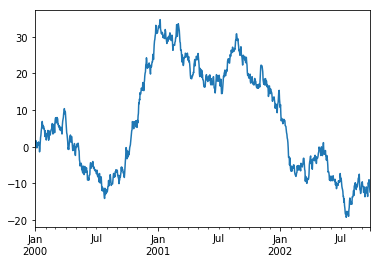

In [114]:
# plotting
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

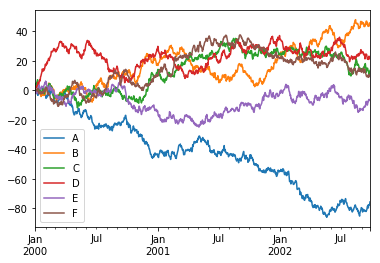

In [122]:
df = pd.DataFrame(np.random.randn(1000,6),index=ts.index, columns=['A','B','C','D','E','F'])
df = df.cumsum()
#plt.figure()
df.plot()
#plt.legend(loc='best')

In [123]:
# Getting Data In/Out
# 1 writing to a csv file
df.to_csv('foo.csv')

In [124]:
# 2 reading from a csv file
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D,E,F
0,2000-01-01,-0.424033,1.052178,2.657859,0.378307,-0.658532,1.223956
1,2000-01-02,0.273079,2.337299,2.971312,1.353945,-1.967916,1.391395
2,2000-01-03,-1.014330,1.806939,4.487926,1.601417,-0.135273,-0.078177
3,2000-01-04,-0.406316,2.575130,4.052802,2.606622,-1.233710,0.600415
4,2000-01-05,-0.990403,1.919282,5.476759,2.399469,-1.528136,-0.236086
5,2000-01-06,-0.477149,3.152570,5.699065,3.056002,-1.974881,-0.026435
6,2000-01-07,-2.459680,4.197204,5.880100,3.235469,-0.314739,-0.249089
7,2000-01-08,-2.067981,2.643017,7.220698,3.644532,-0.941255,0.015527
8,2000-01-09,-3.377965,2.198173,5.159151,5.536750,1.600983,1.269307
9,2000-01-10,-2.441876,0.852002,4.411755,4.257894,2.114389,-0.659065


In [125]:
# 3 reading and wirting to HDF5Stores 
df.to_hdf('foo.h5','df')

In [126]:
pd.read_hdf('foo.h5','df')

,A,B,C,D,E,F
2000-01-01,-0.424033,1.052178,2.657859,0.378307,-0.658532,1.223956
2000-01-02,0.273079,2.337299,2.971312,1.353945,-1.967916,1.391395
2000-01-03,-1.014330,1.806939,4.487926,1.601417,-0.135273,-0.078177
2000-01-04,-0.406316,2.575130,4.052802,2.606622,-1.233710,0.600415
2000-01-05,-0.990403,1.919282,5.476759,2.399469,-1.528136,-0.236086
2000-01-06,-0.477149,3.152570,5.699065,3.056002,-1.974881,-0.026435
2000-01-07,-2.459680,4.197204,5.880100,3.235469,-0.314739,-0.249089
2000-01-08,-2.067981,2.643017,7.220698,3.644532,-0.941255,0.015527
2000-01-09,-3.377965,2.198173,5.159151,5.536750,1.600983,1.269307
2000-01-10,-2.441876,0.852002,4.411755,4.257894,2.114389,-0.659065


In [127]:
# 4 reading and writing to MS Excel
df.to_excel('foo.xlsx',sheet_name='sheetfoo1')

In [129]:
pd.read_excel('foo.xlsx','sheetfoo1',index_col=None,na_values=['NA'])

,Unnamed: 0,A,B,C,D,E,F
0,2000-01-01,-0.424033,1.052178,2.657859,0.378307,-0.658532,1.223956
1,2000-01-02,0.273079,2.337299,2.971312,1.353945,-1.967916,1.391395
2,2000-01-03,-1.014330,1.806939,4.487926,1.601417,-0.135273,-0.078177
3,2000-01-04,-0.406316,2.575130,4.052802,2.606622,-1.233710,0.600415
4,2000-01-05,-0.990403,1.919282,5.476759,2.399469,-1.528136,-0.236086
5,2000-01-06,-0.477149,3.152570,5.699065,3.056002,-1.974881,-0.026435
6,2000-01-07,-2.459680,4.197204,5.880100,3.235469,-0.314739,-0.249089
7,2000-01-08,-2.067981,2.643017,7.220698,3.644532,-0.941255,0.015527
8,2000-01-09,-3.377965,2.198173,5.159151,5.536750,1.600983,1.269307
9,2000-01-10,-2.441876,0.852002,4.411755,4.257894,2.114389,-0.659065
